# Imports

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
## Set pandas options
pd.set_option("display.max_columns", 500)

## Set default theme seaborn
sns.set_theme()

## Increase plot size
plt.rcParams["figure.figsize"] = [14, 7]

# Load and clean data

In [69]:
df = pd.read_csv("./data/chuvas-RJ-por-dia.csv", sep=";", decimal=",", parese_dates=["Data Medicao"])

## Remove dummy column created because of file formatting
df = df.drop(columns=["Unnamed: 11"])

df = df.rename(columns={
    "Data Medicao": "datetime",
    "PRECIPITACAO TOTAL, DIARIO (AUT)(mm)": "total_rain",
    "PRESSAO ATMOSFERICA MEDIA DIARIA (AUT)(mB)": "avg_pressure",
    "TEMPERATURA DO PONTO DE ORVALHO MEDIA DIARIA (AUT)(°C)": "dew_point_avg_temp",
    "TEMPERATURA MAXIMA, DIARIA (AUT)(°C)": "max_temp",
    "TEMPERATURA MEDIA, DIARIA (AUT)(°C)": "avg_temp",
    "TEMPERATURA MINIMA, DIARIA (AUT)(°C)": "min_temp",
    "UMIDADE RELATIVA DO AR, MEDIA DIARIA (AUT)(%)": "avg_hum",
    "UMIDADE RELATIVA DO AR, MINIMA DIARIA (AUT)(%)": "min_hum",
    "VENTO, RAJADA MAXIMA DIARIA (AUT)(m/s)": "max_wind_speed",
    "VENTO, VELOCIDADE MEDIA DIARIA (AUT)(m/s)": "avg_wind_speed",
})

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   datetime            3653 non-null   datetime64[ns]
 1   total_rain          3605 non-null   float64       
 2   avg_pressure        3620 non-null   float64       
 3   dew_point_avg_temp  3616 non-null   float64       
 4   max_temp            3623 non-null   float64       
 5   avg_temp            3611 non-null   float64       
 6   min_temp            3623 non-null   float64       
 7   avg_hum             3626 non-null   float64       
 8   min_hum             3641 non-null   float64       
 9   max_wind_speed      3629 non-null   float64       
 10  avg_wind_speed      3606 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 314.1 KB


# Visualize evolution through time

<AxesSubplot:>

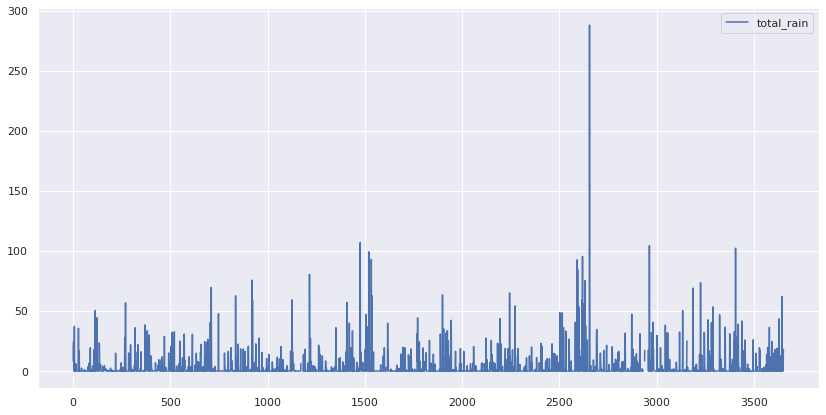

In [68]:
df.plot.line(y="total_rain")

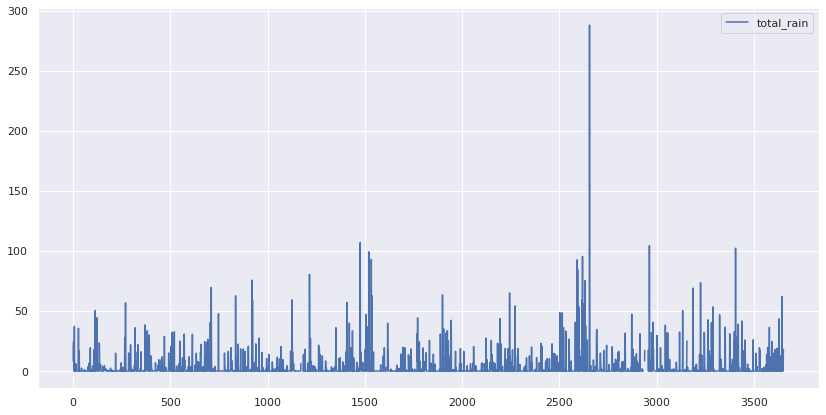

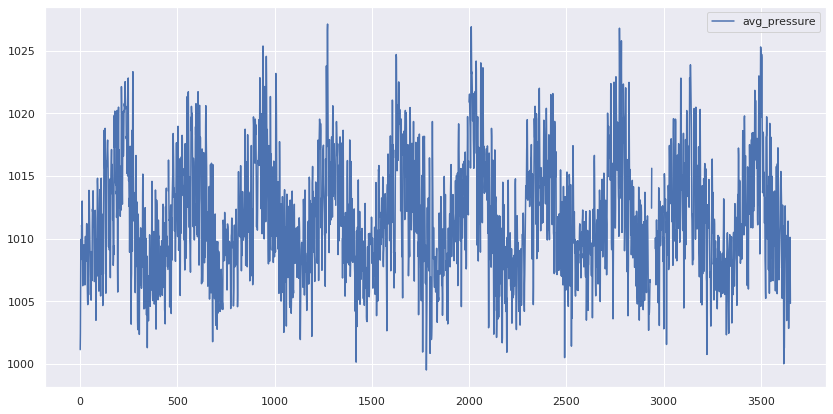

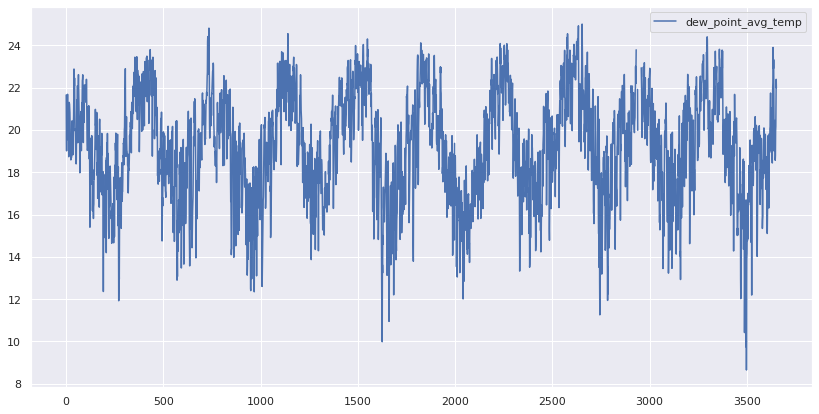

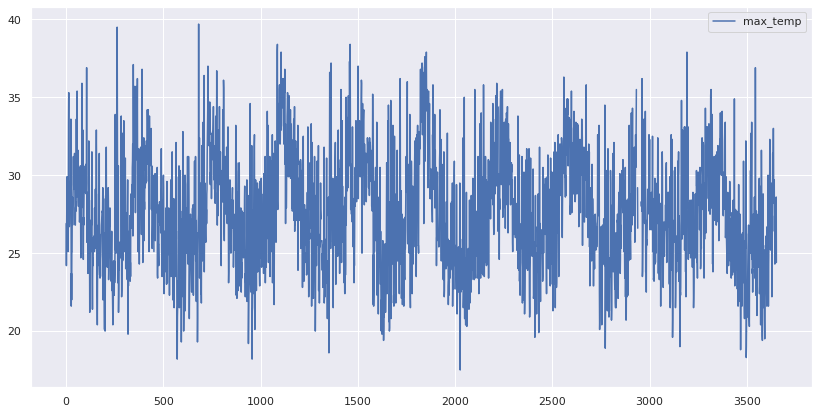

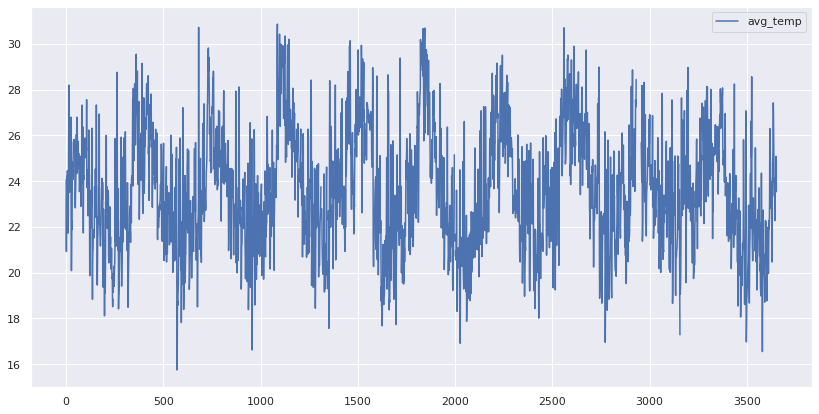

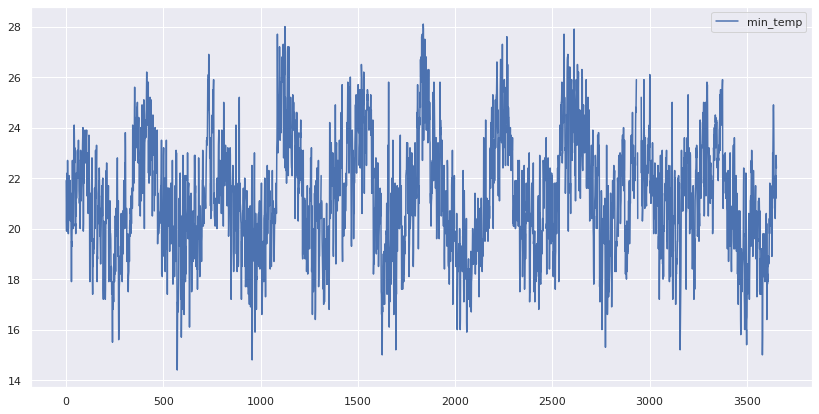

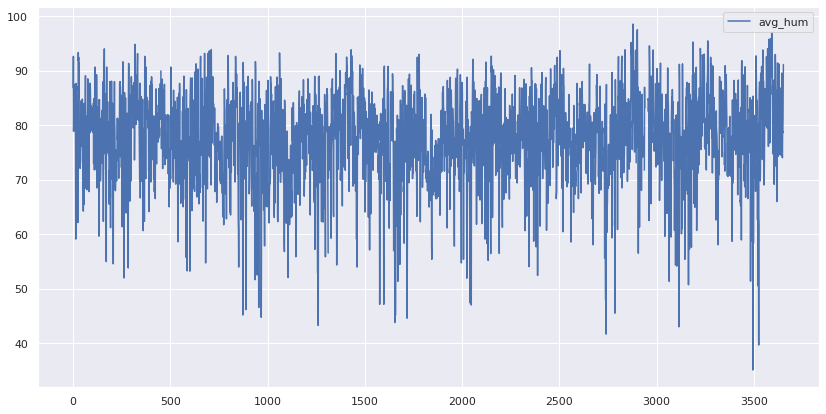

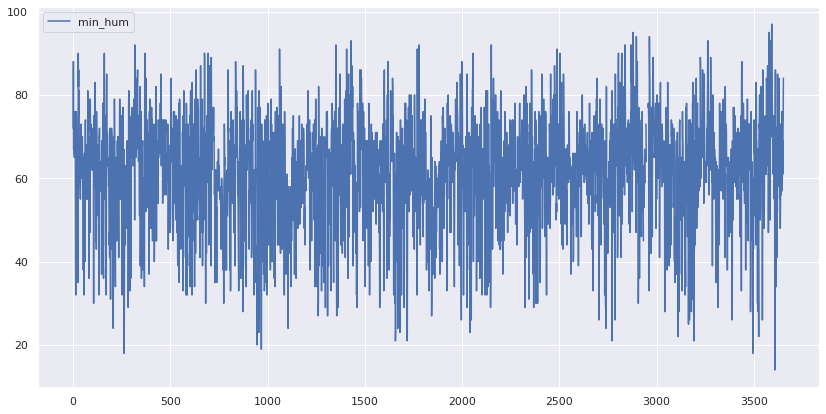

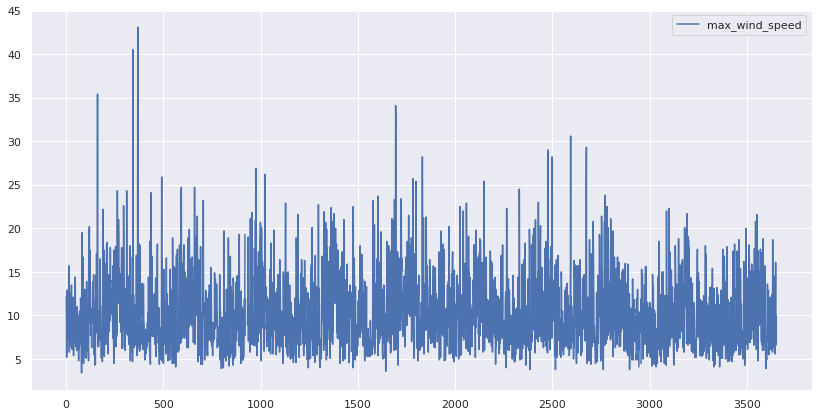

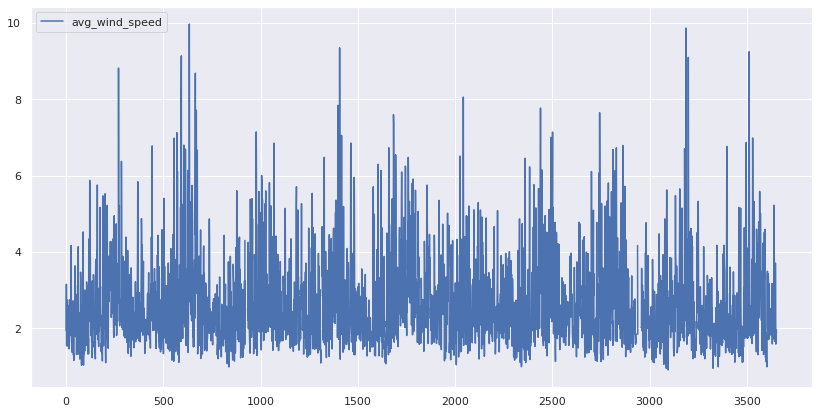

In [64]:
for column in df.columns[1:]:
    df.plot.line(y=column)

In [48]:
df.corr()

,total_rain,avg_pressure,dew_point_avg_temp,max_temp,avg_temp,min_temp,avg_hum,min_hum,max_wind_speed,avg_wind_speed
total_rain,1.000000,0.018235,0.044489,-0.171006,-0.128256,-0.112588,0.255471,0.241997,0.140777,0.091456
avg_pressure,0.018235,1.000000,-0.605412,-0.608886,-0.665545,-0.624693,0.041390,0.171846,-0.014269,0.168817
dew_point_avg_temp,0.044489,-0.605412,1.000000,0.580492,0.727967,0.818594,0.388864,0.244543,-0.144843,-0.195495
max_temp,-0.171006,-0.608886,0.580492,1.000000,0.927208,0.778122,-0.444257,-0.582507,-0.102311,-0.216320
avg_temp,-0.128256,-0.665545,0.727967,0.927208,1.000000,0.920326,-0.340517,-0.401026,-0.130536,-0.231727
min_temp,-0.112588,-0.624693,0.818594,0.778122,0.920326,1.000000,-0.111194,-0.172430,-0.083976,-0.143622
avg_hum,0.255471,0.041390,0.388864,-0.444257,-0.340517,-0.111194,1.000000,0.872166,-0.003242,0.046648
min_hum,0.241997,0.171846,0.244543,-0.582507,-0.401026,-0.172430,0.872166,1.000000,-0.059324,0.048824
max_wind_speed,0.140777,-0.014269,-0.144843,-0.102311,-0.130536,-0.083976,-0.003242,-0.059324,1.000000,0.680944
avg_wind_speed,0.091456,0.168817,-0.195495,-0.216320,-0.231727,-0.143622,0.046648,0.048824,0.680944,1.000000


<AxesSubplot:xlabel='avg_hum', ylabel='total_rain'>

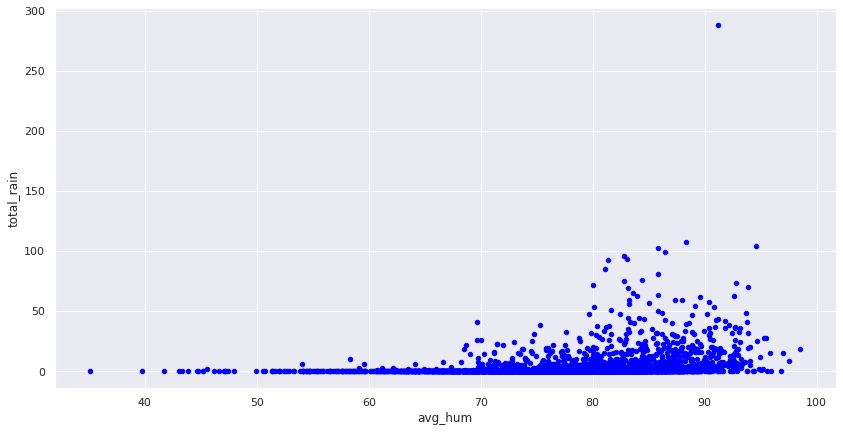

In [55]:
df.plot.scatter(x="avg_hum", y="total_rain", c=["blue"])

In [57]:
df.isnull().sum()

date                   0
total_rain            48
avg_pressure          33
dew_point_avg_temp    37
max_temp              30
avg_temp              42
min_temp              30
avg_hum               27
min_hum               12
max_wind_speed        24
avg_wind_speed        47
dtype: int64